In [1]:
import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns

%matplotlib inline

## Question 2
A referral is considered a "successful" referral if it results in an Individualized Family Service Plan (IFSP).

Are there referral sources that have had higher rates of successful referrals?

You can determine whether a referral was successful by looking at whether the Initial IFSP Date
column is filled in or whether the Child Phase column is equal to IFSP.

In [2]:
teis_final = pd.read_csv('../data/teis_final_data.csv')

teis_final

,Child ID,Notification Date,Fiscal Year,Notification Month,Tenn Region,Fiscal Year.1,third_DOB,Late Referral,Qtr,POE,...,Service Coordinator,Parent Consent,Initial Eligibility,Initial Eligibility Date,Initial IFSP Date,Latest IFSP,Exit Reason,Exit Date,Referral Source Type Name,Year
0,104085,2018-01-20,2017-2018,Jan,Middle,2017.0,2010-07-07,1.0,3.0,GN,...,NaN,NaN,NaN,NaN,NaN,NaN,Unable to contact,2010-01-25,DCS,2018
1,350065,2016-08-17,2016-2017,Aug,Middle,2016.0,2016-10-15,1.0,1.0,UC,...,Steven Scarlett,NaN,NaN,NaN,NaN,NaN,Unable to contact,2016-08-31,PCP,2016
2,351755,2016-07-12,2016-2017,Jul,Western,2016.0,2016-11-13,NaN,1.0,NW,...,Rene Bard,2016-07-12,Ineligible,8/25/2016,NaN,NaN,Ineligible for Part C,2016-08-25,Parent,2016
3,353800,2016-09-14,2016-2017,Sep,Eastern,2016.0,2016-10-01,1.0,1.0,FT,...,Jennifer Terranera - 45 days,NaN,NaN,NaN,NaN,NaN,Referral less than 45 days,2016-09-15,Parent,2016
4,353805,2016-08-05,2016-2017,Aug,Middle,2016.0,2016-12-04,NaN,1.0,UC,...,Anna Bolin,2016-08-15,Eligible,10/5/2016,10/10/2016,NaN,618 - Part B eligibility not determined,2016-12-03,Dept. of Health,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115519,531592,2022-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GN,...,Kim Correll,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PCP,2022
115520,531593,2022-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GN,...,Kim Correll,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PCP,2022
115521,531594,2022-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GN,...,Kim Correll,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other Health Care Provider,2022
115522,531595,2022-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GN,...,Kim Correll,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital,2022


In [3]:
teis_final['Successful'] = ((teis_final['Child Phase'] == "IFSP") | (teis_final['Initial IFSP Date'].notnull()))

In [4]:
teis_final.head()

,Child ID,Notification Date,Fiscal Year,Notification Month,Tenn Region,Fiscal Year.1,third_DOB,Late Referral,Qtr,POE,...,Parent Consent,Initial Eligibility,Initial Eligibility Date,Initial IFSP Date,Latest IFSP,Exit Reason,Exit Date,Referral Source Type Name,Year,Successful
0,104085,2018-01-20,2017-2018,Jan,Middle,2017.0,2010-07-07,1.0,3.0,GN,...,NaN,NaN,NaN,NaN,NaN,Unable to contact,2010-01-25,DCS,2018,False
1,350065,2016-08-17,2016-2017,Aug,Middle,2016.0,2016-10-15,1.0,1.0,UC,...,NaN,NaN,NaN,NaN,NaN,Unable to contact,2016-08-31,PCP,2016,False
2,351755,2016-07-12,2016-2017,Jul,Western,2016.0,2016-11-13,NaN,1.0,NW,...,2016-07-12,Ineligible,8/25/2016,NaN,NaN,Ineligible for Part C,2016-08-25,Parent,2016,False
3,353800,2016-09-14,2016-2017,Sep,Eastern,2016.0,2016-10-01,1.0,1.0,FT,...,NaN,NaN,NaN,NaN,NaN,Referral less than 45 days,2016-09-15,Parent,2016,False
4,353805,2016-08-05,2016-2017,Aug,Middle,2016.0,2016-12-04,NaN,1.0,UC,...,2016-08-15,Eligible,10/5/2016,10/10/2016,NaN,618 - Part B eligibility not determined,2016-12-03,Dept. of Health,2016,True


In [5]:
total_referrals = teis_final.groupby(['Referral Source Type Name'])['Successful'].count()
total_referrals

Referral Source Type Name
CAPTA                                2
Child Care provider                434
Community/Child Find Activity      386
DCS                              25721
DHS                                 13
DMRS                                 1
Dept. of Health                   3675
EIRA                               351
Early Head Start/Head Start       1025
Family and Friends                 516
Foster Parent                      421
Hospital                          7292
LEA                                 16
NHS                                222
NICU                              3275
OT                                  86
Other                             2612
Other Health Care Provider        2326
PCP                              43899
PICU                                26
PT                                 623
Parent                           21944
Speech Therapist                   654
TIPS                                 4
Name: Successful, dtype: int64

In [6]:
total_referrals_successful = teis_final.groupby(['Referral Source Type Name'])['Successful'].sum()
total_referrals_successful

Referral Source Type Name
CAPTA                                0
Child Care provider                179
Community/Child Find Activity      155
DCS                               4510
DHS                                  3
DMRS                                 1
Dept. of Health                   1375
EIRA                               169
Early Head Start/Head Start        423
Family and Friends                 274
Foster Parent                      262
Hospital                          2916
LEA                                  6
NHS                                 69
NICU                              1158
OT                                  44
Other                             1184
Other Health Care Provider        1146
PCP                              18264
PICU                                15
PT                                 375
Parent                           12595
Speech Therapist                   395
TIPS                                 2
Name: Successful, dtype: int64

In [7]:
tot_ref = pd.merge(total_referrals, total_referrals_successful, on='Referral Source Type Name', how='left').rename(columns = {'Successful_x' : 'Total Referrals', 'Successful_y' : 'Total Successful Referrals'})
tot_ref.reset_index()

,Referral Source Type Name,Total Referrals,Total Successful Referrals
0,CAPTA,2,0
1,Child Care provider,434,179
2,Community/Child Find Activity,386,155
3,DCS,25721,4510
4,DHS,13,3
5,DMRS,1,1
6,Dept. of Health,3675,1375
7,EIRA,351,169
8,Early Head Start/Head Start,1025,423
9,Family and Friends,516,274


In [8]:
tot_ref['Percentage Success'] = ((tot_ref['Total Successful Referrals']/tot_ref['Total Referrals']) * 100).round(decimals=2)
tot_ref.reset_index()
tot_ref.columns

Index(['Total Referrals', 'Total Successful Referrals', 'Percentage Success'], dtype='object')

In [9]:
tot_ref=tot_ref.reset_index()

In [10]:
tot_ref=tot_ref.sort_values(by='Percentage Success', ascending = False)

In [11]:
tot_ref

,Referral Source Type Name,Total Referrals,Total Successful Referrals,Percentage Success
5,DMRS,1,1,100.00
10,Foster Parent,421,262,62.23
22,Speech Therapist,654,395,60.40
20,PT,623,375,60.19
19,PICU,26,15,57.69
21,Parent,21944,12595,57.40
9,Family and Friends,516,274,53.10
15,OT,86,44,51.16
23,TIPS,4,2,50.00
17,Other Health Care Provider,2326,1146,49.27


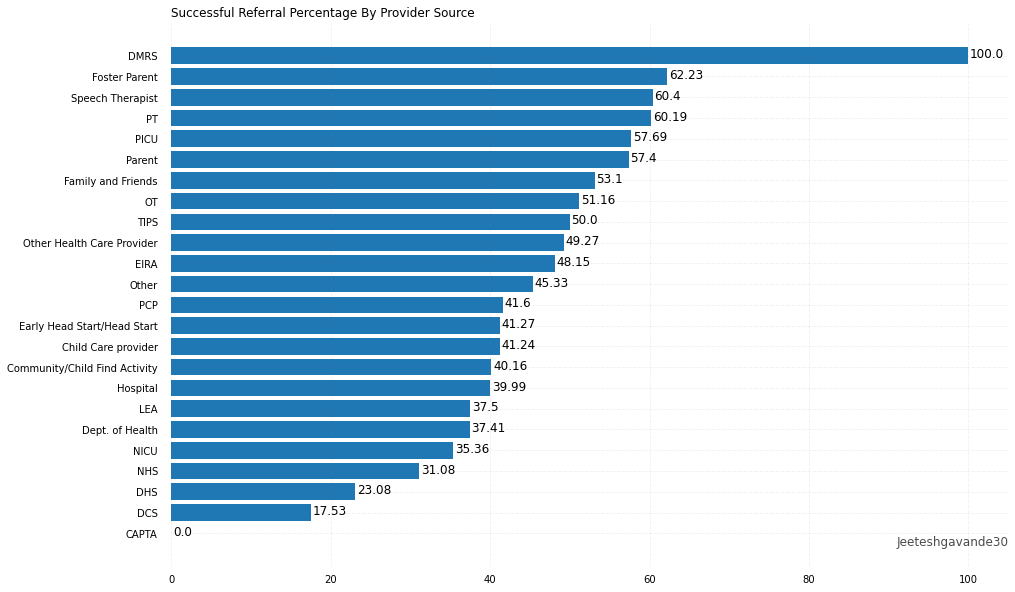

In [12]:
fig, ax = plt.subplots(figsize =(15, 10))
 
# Horizontal Bar Plot
ax.barh(tot_ref['Referral Source Type Name'], tot_ref['Percentage Success'])
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 12, fontweight ='normal',
             color ='black')
 
# Add Plot Title
ax.set_title('Successful Referral Percentage By Provider Source',
             loc ='left', )
 
# Add Text watermark
fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12,
         color ='black', ha ='right', va ='bottom',
         alpha = 0.7)
 
# Show Plot
plt.show()

In [13]:
tot_ref2=tot_ref.sort_values(by='Total Referrals', ascending = False)
tot_ref2

,Referral Source Type Name,Total Referrals,Total Successful Referrals,Percentage Success
18,PCP,43899,18264,41.60
3,DCS,25721,4510,17.53
21,Parent,21944,12595,57.40
11,Hospital,7292,2916,39.99
6,Dept. of Health,3675,1375,37.41
14,NICU,3275,1158,35.36
16,Other,2612,1184,45.33
17,Other Health Care Provider,2326,1146,49.27
8,Early Head Start/Head Start,1025,423,41.27
22,Speech Therapist,654,395,60.40


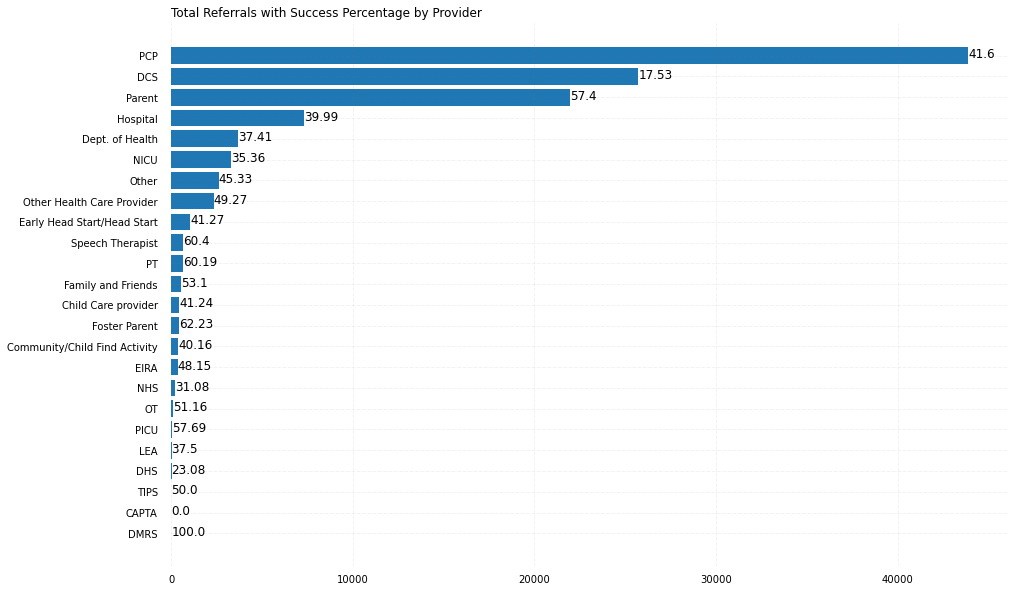

In [14]:
# Figure Size
fig, ax = plt.subplots(figsize =(15, 10))
 
# Horizontal Bar Plot
ax.barh(tot_ref2['Referral Source Type Name'], tot_ref2['Total Referrals'])
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='gray',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for counter, i in enumerate(ax.patches):
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             #str(round((i.get_width()), 2)),
             str(tot_ref2['Percentage Success'].values[counter]),
             fontsize = 12, fontweight ='normal',
             color ='black')
 
# Add Plot Title
ax.set_title('Total Referrals with Success Percentage by Provider',
             loc ='left', )
 
# S
# Show Plot
plt.show()


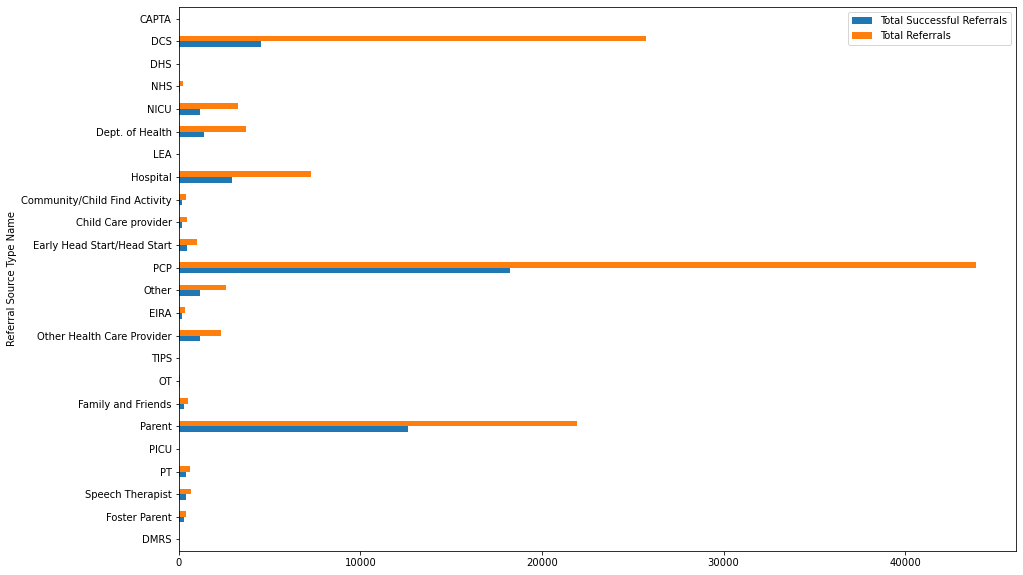

In [23]:
tot_ref.plot(x='Referral Source Type Name',
                y = ['Total Successful Referrals', 'Total Referrals'], kind = 'barh', figsize = (15,10));


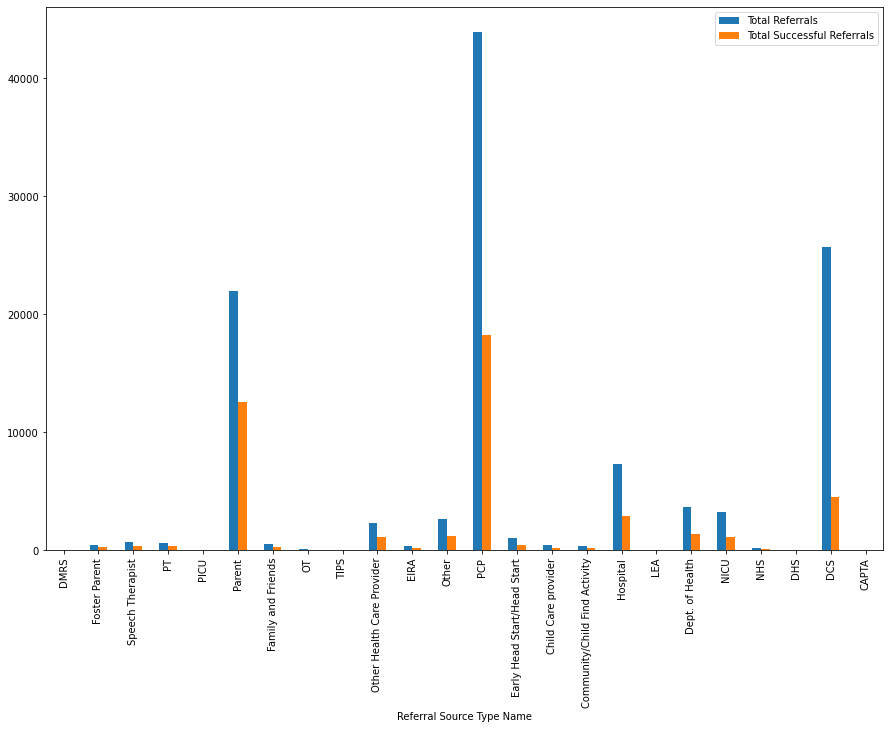

In [19]:
tot_ref.plot(x='Referral Source Type Name',
                y = ['Total Referrals', 'Total Successful Referrals'], kind = 'bar', figsize = (15,10));

KeyError: 'Referral Source Type Name'